In [3]:
def find_s_algorithm(training_data):
    # Initialize the hypothesis with the most specific hypothesis
    hypothesis = ['0'] * (len(training_data[0]) - 1)
    # Iterate through each training example
    for example in training_data:
        # Check if the example is positive (last column is 1)
        if example[-1] == '1':
            # Update the hypothesis based on positive example
            for i in range(len(example) - 1):
                if hypothesis[i] == '0':
                    hypothesis[i] = example[i]

    return hypothesis
# Example usage
training_data = [
    ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', '1'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Warm', '1'],
    ['Rainy', 'Cold', 'High', 'Weak', 'Cool', '0'],
    ['Sunny', 'Warm', 'High', 'Weak', 'Cool', '1']
]
result_hypothesis = find_s_algorithm(training_data)
print("Final Hypothesis:", result_hypothesis)

Final Hypothesis: ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm']


In [5]:
import copy


def initialize_hypothesis(num_attributes):
    # Added indentation here
    hypothesis = [
        {'?'} for _ in range(num_attributes)  # Most general hypothesis
    ]
    return hypothesis


def is_consistent(instance, hypothesis):
    for attr, value in zip(instance[:-1], hypothesis):
        if value != '?' and value != attr:
            return False
    return True


def specialize_hypothesis(hypothesis, instance):
    new_hypothesis = copy.deepcopy(hypothesis)
    for i, (attr, value) in enumerate(zip(instance[:-1], hypothesis)):
        if value == '?':
            new_hypothesis[i] = attr
        elif value != attr:
            new_hypothesis[i] = '?'
    return new_hypothesis


def generalize_hypothesis(hypothesis, instance, domain):
    new_hypothesis = copy.deepcopy(hypothesis)
    for i, (attr, value) in enumerate(zip(instance[:-1], hypothesis)):
        if value != '?' and value != attr:
            new_hypothesis[i] = domain[i]
    return new_hypothesis


def candidate_elimination(training_data):
    num_attributes = len(training_data[0]) - 1
    domain = ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm']
    specific_hypothesis = initialize_hypothesis(num_attributes)
    general_hypothesis = initialize_hypothesis(num_attributes)
    # Iterate through each training example

    for instance in training_data:
        if instance[-1] == '1':
            specific_hypothesis = specialize_hypothesis(
                specific_hypothesis, instance)
            for i, (attr, value) in enumerate(
                    zip(instance[:-1], general_hypothesis)):
                if value == '?':
                    general_hypothesis[i] = attr
                elif value != attr:
                    general_hypothesis[i] = '?'
                else:
                    general_hypothesis = generalize_hypothesis(
                        general_hypothesis, instance, domain)

    return specific_hypothesis, general_hypothesis


training_data = [
    ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', '1'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Warm', '1'],
    ['Rainy', 'Cold', 'High', 'Weak', 'Cool', '0'],
    ['Sunny', 'Warm', 'High', 'Weak', 'Cool', '1']
]
specific, general = candidate_elimination(training_data)
print("Specific Hypothesis:", specific)
print("General Hypothesis:", general)

Specific Hypothesis: ['Sunny', 'Warm', 'High', '?', '?']
General Hypothesis: ['Sunny', 'Warm', 'High', '?', '?']


In [9]:
import numpy as np

class Node:
    def __init__(self, attribute=None, label=None, branches=None):
        self.attribute = attribute
        self.label = label
        self.branches = branches

    def entropy(self, data): # Added self
        _, counts = np.unique(data[:, -1], return_counts=True)
        probabilities = counts / data.shape[0]
        return -np.sum(probabilities * np.log2(probabilities + 1e-10))

    def information_gain(self, data, attribute_index): # Added self
        values, counts = np.unique(data[:, attribute_index], return_counts=True)
        total_entropy = self.entropy(data) # Call entropy using self
        weighted_entropy = sum((count/data.shape[0]) * self.entropy(data[data[:, attribute_index] == value]) for value, count in zip(values, counts)) # Call entropy using self
        return total_entropy - weighted_entropy

    def id3(self, data, attributes): # Added self
        unique_labels, label_counts = np.unique(data[:, -1], return_counts=True)
        if len(unique_labels) == 1:
            return Node(label=unique_labels[0])
        if len(attributes) == 0:
            majority_label = unique_labels[np.argmax(label_counts)]
            return Node(label=majority_label)
        best_attribute = max(attributes, key=lambda x: self.information_gain(data, x)) # Call information_gain using self
        values, _ = np.unique(data[:, best_attribute], return_counts=True)
        branches = {}
        for value in values:
            subset = data[data[:, best_attribute] == value]
            if subset.shape[0] == 0:
                majority_label = unique_labels[np.argmax(label_counts)]
                branches[value] = Node(label=majority_label)
            else:
                new_attributes = [attr for attr in attributes if attr != best_attribute]
                branches[value] = self.id3(subset, new_attributes) # Call id3 using self
        return Node(attribute=best_attribute, branches=branches)

    def print_tree(self, node, level=0, prefix="Root: "): # Added self
        if node.label is not None:
            print(" " * level, prefix + "Class:", node.label)
        else:
            print(" " * level, prefix + "Attribute:", node.attribute)
            # Check if node.branches is not None before iterating
            if node.branches is not None:
                for value, child in node.branches.items():
                    self.print_tree(child, level + 1, f"Value '{value}': ") # Call print_tree using self

data = np.array([
    ['Sunny', 'Hot', 'High', 'Weak', 'No'],
    ['Sunny', 'Hot', 'High', 'Strong', 'No'],
    ['Overcast', 'Hot', 'High', 'Weak', 'Yes'],
    ['Rainy', 'Mild', 'High', 'Weak', 'Yes'],
    ['Rainy', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rainy', 'Cool', 'Normal', 'Strong', 'No'],
    ['Overcast', 'Cool', 'Normal', 'Strong', 'Yes'],
    ['Sunny', 'Mild', 'High', 'Weak', 'No'],
    ['Sunny', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rainy', 'Mild', 'Normal', 'Weak', 'Yes'],
    ['Sunny', 'Mild', 'Normal', 'Strong', 'Yes'],
    ['Overcast', 'Mild', 'High', 'Strong', 'Yes'],
    ['Overcast', 'Hot', 'Normal', 'Weak', 'Yes'],
    ['Rainy', 'Mild', 'High', 'Strong', 'No']
])
attributes = [0, 1, 2, 3]
decision_tree = Node().id3(data, attributes) # Create an instance of Node and then call id3
Node().print_tree(decision_tree) # Create an instance of Node and then call print_tree

 Root: Attribute: 0
  Value 'Overcast': Class: Yes
  Value 'Rainy': Attribute: 3
   Value 'Strong': Class: No
   Value 'Weak': Class: Yes
  Value 'Sunny': Attribute: 2
   Value 'High': Class: No
   Value 'Normal': Class: Yes


Linear Regression Coefficients: [2.2 0.6]


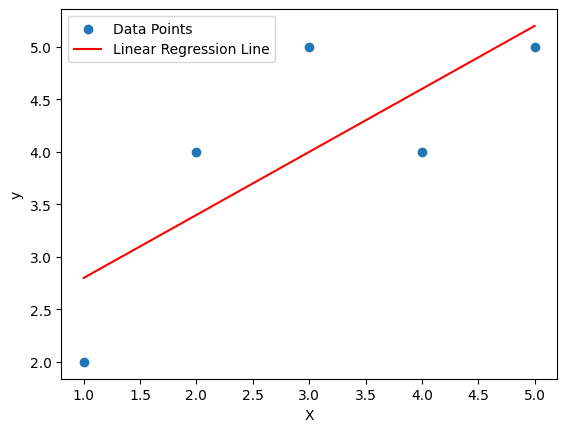

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def linear_regression(X, y):
    # Indented the lines within the function body
    X = np.column_stack((np.ones_like(X), X))
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])
theta = linear_regression(X, y)
print("Linear Regression Coefficients:", theta)
plt.scatter(X, y, label="Data Points")
plt.plot(X, theta[0] + theta[1] * X, color='red', label="Linear Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [13]:
import numpy as np
from scipy.optimize import minimize

def sigmoid(z):
    return 1 / (1 + np.exp(-z)) # Indented this line

def logistic_regression(X, y):
    X = np.column_stack((np.ones_like(X), X))
    initial_theta = np.zeros(X.shape[1])
    result = minimize(
        fun=lambda theta: np.sum(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta))),
        x0=initial_theta,
        method='TNC'
    )
    return result.x

X_logistic = np.array([1, 2, 3, 4, 5])
y_logistic = np.array([0, 0, 1, 0, 1])
theta_logistic = logistic_regression(X_logistic, y_logistic)
print("Logistic Regression Coefficients:", theta_logistic)

Logistic Regression Coefficients: [-3.89631868  1.09109771]


In [15]:
def binary_classifier(X, y, threshold=0.5):
    # Indented the following lines to be part of the function body
    theta_classifier = logistic_regression(X, y)
    probabilities = sigmoid(np.column_stack((np.ones_like(X), X)) @ theta_classifier)
    predictions = (probabilities >= threshold).astype(int)
    return predictions

X_classifier = np.array([1, 2, 3, 4, 5])
y_classifier = np.array([0, 0, 1, 0, 1])
predictions = binary_classifier(X_classifier, y_classifier)
print("Binary Classifier Predictions:", predictions)

Binary Classifier Predictions: [0 0 0 1 1]


In [16]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def generate_data(size=100):
    np.random.seed(42)
    X = np.sort(5 * np.random.rand(size, 1), axis=0)
    y = np.sin(X).ravel() + np.random.normal(0, 0.1, size)  # Add noise
    return X, y

def calculate_bias_variance(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Bias calculation corrected
    bias = np.mean((y_test - np.mean(y_test_pred))**2)
    variance = np.mean(np.var(y_test_pred))
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    return bias, variance, train_error, test_error

def cross_validate(model, X, y, k=5):
    scores = cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error')
    return -scores

# Removed remove_duplicates function as it's not necessary

X, y = generate_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
bias, variance, train_error, test_error = calculate_bias_variance(linear_model, X_train, y_train, X_test, y_test)

print("Bias:", bias)
print("Variance:", variance)
print("Training Error:", train_error)
print("Testing Error:", test_error)

# Cross-validation on the original data
cv_scores = cross_validate(linear_model, X, y)

print("\nCross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", np.mean(cv_scores))

Bias: 0.4806158313599342
Variance: 0.2888428252565104
Training Error: 0.1783546839731641
Testing Error: 0.22510454098275043

Cross-validation Scores: [1.48056649 0.27892965 0.43651681 0.0460009  0.52501915]
Mean Cross-validation Score: 0.5534066005180007


In [17]:
import pandas as pd

def one_hot_encoding(data, categorical_columns):
    """
    Performs one-hot encoding on a pandas DataFrame.

    Args:
        data: The input pandas DataFrame.
        categorical_columns: A list of column names to be one-hot encoded.

    Returns:
        A new DataFrame with the specified columns one-hot encoded.
    """
    return pd.get_dummies(data, columns=categorical_columns)

# Sample data
data = {
    'City': ['New York', 'San Francisco', 'Chicago', 'New York'],
    'Temperature': [32, 70, 65, 32],
    'Rain': ['Yes', 'No', 'No', 'Yes']
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Specify categorical columns for encoding
categorical_columns = ['City', 'Rain']

# Perform one-hot encoding
encoded_df = one_hot_encoding(df, categorical_columns)

print("\nDataFrame after One-Hot Encoding:")
print(encoded_df)

Original DataFrame:
            City  Temperature Rain
0       New York           32  Yes
1  San Francisco           70   No
2        Chicago           65   No
3       New York           32  Yes

DataFrame after One-Hot Encoding:
   Temperature  City_Chicago  City_New York  City_San Francisco  Rain_No  \
0           32         False           True               False    False   
1           70         False          False                True     True   
2           65          True          False               False     True   
3           32         False           True               False    False   

   Rain_Yes  
0      True  
1     False  
2     False  
3      True  


In [23]:
import numpy as np


class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        self.hidden_layer_input = np.dot(inputs, self.weights_input_hidden)
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input + self.bias_hidden)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output)
        self.predicted_output = self.sigmoid(self.output_layer_input + self.bias_output)
        return self.predicted_output

    def backward(self, inputs, targets):
        error = targets - self.predicted_output
        output_delta = error * self.sigmoid_derivative(self.predicted_output)
        hidden_layer_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_layer_delta = hidden_layer_error * self.sigmoid_derivative(self.hidden_layer_output)
        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
        self.weights_input_hidden += inputs.T.dot(hidden_layer_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * self.learning_rate

    def train(self, inputs, targets, epochs):
        for epoch in range(epochs):
            for input_data, target in zip(inputs, targets):
                input_data = np.array([input_data])
                target = np.array([target])
                self.forward(input_data)
                self.backward(input_data, target)
            mse = np.mean((targets - self.predict(inputs))**2)
            print(f'Epoch {epoch+1}/{epochs}, Mean Squared Error: {mse}')

    def predict(self, inputs):
        return self.forward(inputs)


inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])
nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1, learning_rate=0.1)
nn.train(inputs, targets, epochs=10000)
predictions = nn.predict(inputs)
print("\nPredictions after training:")
print(predictions)

Streaming output truncated to the last 5000 lines.
Epoch 5007/10000, Mean Squared Error: 0.044201216130353695
Epoch 5008/10000, Mean Squared Error: 0.044161110277455534
Epoch 5009/10000, Mean Squared Error: 0.04412105678332862
Epoch 5010/10000, Mean Squared Error: 0.0440810555784141
Epoch 5011/10000, Mean Squared Error: 0.04404110659318476
Epoch 5012/10000, Mean Squared Error: 0.04400120975814502
Epoch 5013/10000, Mean Squared Error: 0.043961365003831764
Epoch 5014/10000, Mean Squared Error: 0.0439215722608146
Epoch 5015/10000, Mean Squared Error: 0.04388183145969619
Epoch 5016/10000, Mean Squared Error: 0.04384214253111268
Epoch 5017/10000, Mean Squared Error: 0.0438025054057343
Epoch 5018/10000, Mean Squared Error: 0.04376292001426542
Epoch 5019/10000, Mean Squared Error: 0.043723386287445286
Epoch 5020/10000, Mean Squared Error: 0.0436839041560482
Epoch 5021/10000, Mean Squared Error: 0.04364447355088402
Epoch 5022/10000, Mean Squared Error: 0.04360509440279854
Epoch 5023/10000, Mea

In [26]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


class KNN:
    def __init__(self, k=3): # Added indentation
        self.k = k
    def fit(self, X_train, y_train): # Added indentation
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test): # Added indentation
        predictions = []
        for test_point in X_test:
            distances = np.linalg.norm(self.X_train - test_point, axis=1)

            sorted_indices = np.argsort(distances)
            k_nearest_labels = self.y_train[sorted_indices[:self.k]]
            unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
            predicted_label = unique_labels[np.argmax(counts)]
            predictions.append(predicted_label)
        return np.array(predictions)
X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_clusters_per_class=1, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNN(k=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


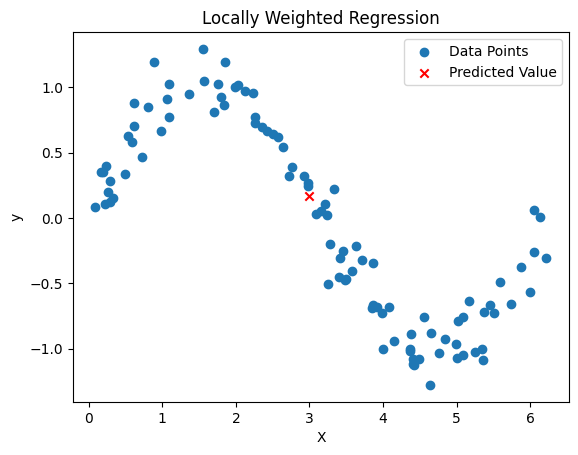

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def locally_weighted_regression(X, y, query_point, tau=0.1):
    m = X.shape[0]
    X_ = np.c_[np.ones((m, 1)), X]  # Add bias term to X
    weights = np.exp(-np.sum((X_[:, 1, None] - query_point)**2, axis=1) / (2 * tau**2))  # Calculate weights
    W = np.diag(weights)  # Create diagonal weight matrix
    theta = np.linalg.solve(X_.T @ W @ X_, X_.T @ W @ y)  # Solve for theta

    # Predict y value for the query point
    query_point_ = np.array([1, query_point])  # Add bias term to query point
    y_pred = query_point_ @ theta  # Calculate predicted value

    return y_pred


# Generate data
X = 2 * np.pi * np.random.rand(100, 1)
y = np.sin(X) + 0.2 * np.random.randn(100, 1)

# Sort data for plotting
sorted_indices = X[:, 0].argsort()
X = X[sorted_indices]
y = y[sorted_indices]

# Set query point and tau
query_point = 3.0
tau = 0.3

# Perform locally weighted regression
y_pred = locally_weighted_regression(X, y, query_point, tau)

# Plot the results
plt.scatter(X, y, label='Data Points')
plt.scatter(query_point, y_pred, color='red', marker='x', label='Predicted Value')
plt.title('Locally Weighted Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Sample data for illustration
documents = [
    ('This is a positive document.', 'positive'),
    ('Negative sentiment in this text.', 'negative'),
    ('Another positive example.', 'positive'),
    ('Not a positive statement.', 'negative'),
    ('Positive vibes here.', 'positive'),
    ('Negative feedback received.', 'negative')
]

# Split the data into features (X) and labels (y)
X, y = zip(*documents)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text data to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Create and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_vectorized)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)

# Handle potential warnings in classification_report
try:
    report = classification_report(y_test, y_pred)
    print("\nClassification Report:\n", report)
except (ValueError, ZeroDivisionError) as e:
    print(f"Warning: Could not generate classification report due to: {e}")

print("Accuracy:", accuracy)


Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00         1
    positive       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Accuracy: 1.0


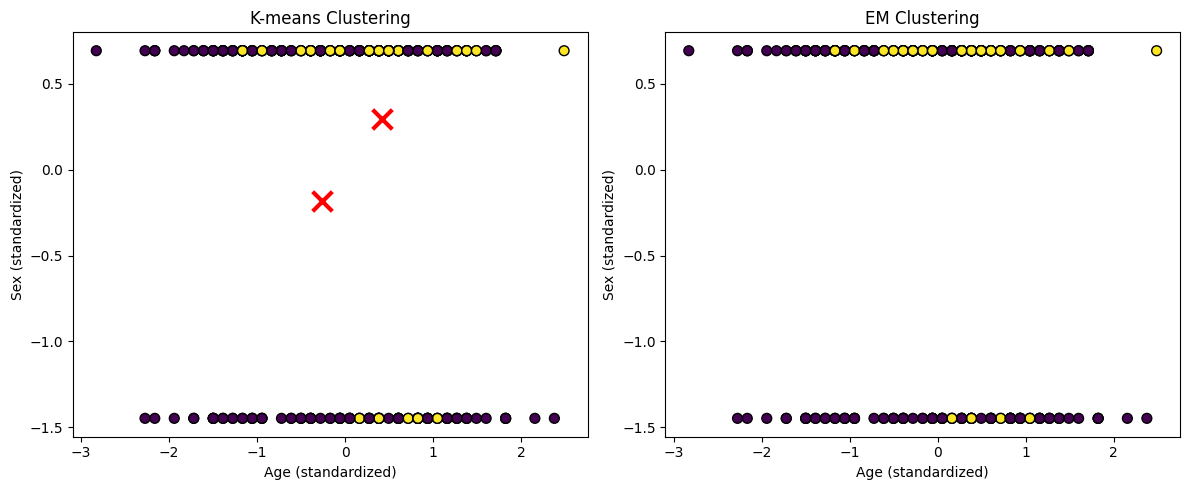

Silhouette Score (K-means): 0.1751
Silhouette Score (EM): 0.1597


In [29]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Fixed URL: Removed line break
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=names, na_values="?")
data = data.dropna()
features = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('K-means Clustering')
plt.xlabel('Age (standardized)')
plt.ylabel('Sex (standardized)')

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('EM Clustering')
plt.xlabel('Age (standardized)')
plt.ylabel('Sex (standardized)')

plt.tight_layout()
plt.show()

silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
silhouette_gmm = silhouette_score(X_scaled, gmm_labels)
print(f'Silhouette Score (K-means): {silhouette_kmeans:.4f}')
print(f'Silhouette Score (EM): {silhouette_gmm:.4f}')

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
Class Distribution:
target
0    50
1    50
2    50
Name: count, dtype: i

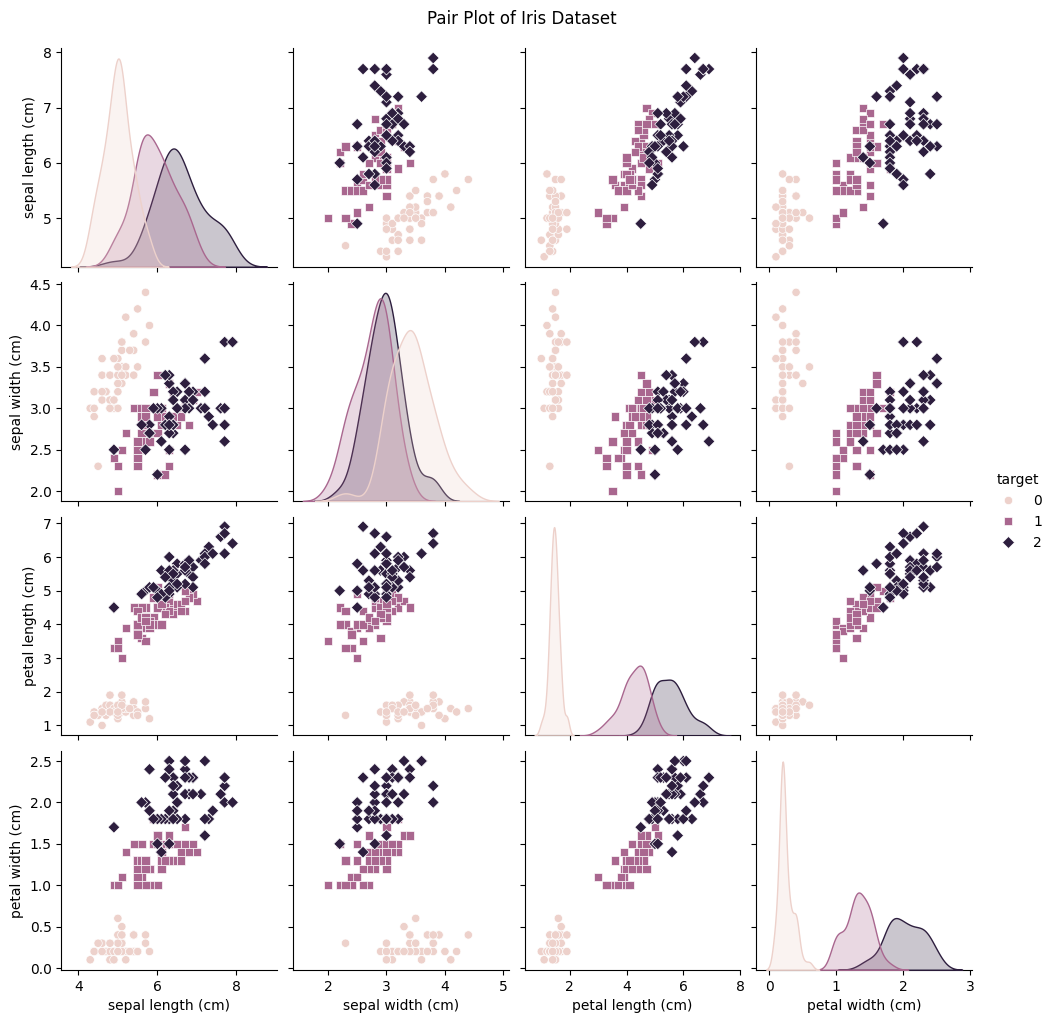

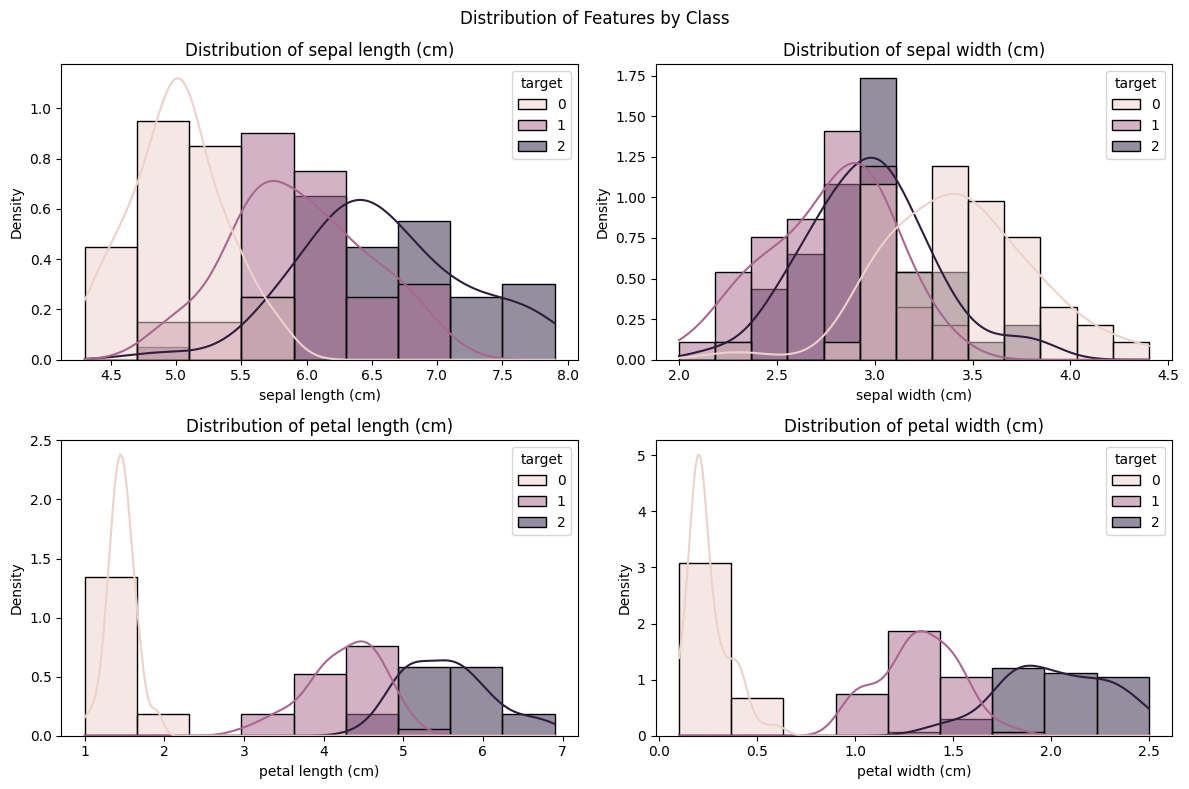

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
print(iris_df.describe())
class_distribution = iris_df['target'].value_counts()
print("Class Distribution:")
print(class_distribution)

sns.pairplot(iris_df, hue='target', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distribution of Features by Class")
for i, ax in enumerate(axes.flatten()):
    feature = iris_df.columns[i]
    sns.histplot(data=iris_df, x=feature, hue='target', kde=True, ax=ax, stat='density', common_norm=False)
    ax.set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()